<a href="https://colab.research.google.com/github/EfrainEsquivar/Challenge-5-ALETIA/blob/main/Challenge_5_1_Efrain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
%matplotlib inline
import matplotlib.pyplot as plt 

BicycleWeatherDF = pd.read_csv("BicycleWeather.csv", index_col='DATE', parse_dates=True)
Fremont_Bridge_Bicycle_CounterDF = pd.read_csv("Fremont_Bridge_Bicycle_Counter.csv", index_col='Date', parse_dates=True)


In [2]:
BicycleWeatherDF.head()

,STATION,NAME,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,...,WT04,WT05,WT08,WT09,WT13,WT14,WT16,WT17,WT18,WT22
DATE,,,,,,,,,,,,,,,,,,,,,
2012-01-01,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",10.51,NaN,NaN,0.00,0.0,0.0,NaN,55,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2012-01-02,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",10.07,NaN,NaN,0.43,0.0,0.0,NaN,51,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2012-01-03,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",5.14,NaN,NaN,0.03,0.0,0.0,NaN,53,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2012-01-04,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",10.51,NaN,NaN,0.80,0.0,0.0,NaN,54,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2012-01-05,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",13.65,NaN,NaN,0.05,0.0,0.0,NaN,48,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [3]:
Fremont_Bridge_Bicycle_CounterDF.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


In [4]:
# Calculamos el trafico diario de bicicletas
daily = Fremont_Bridge_Bicycle_CounterDF.resample('d').sum()
daily['Total'] = daily.sum(axis=1)
daily = daily[['Total']]

In [5]:
# Hint: Algunos días como los fines de semana incentivan el uso de bicicleta
# Solución: Creamos las primeras 7 variables las cuales serán un ID del día de la semana
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(7):
    daily[days[i]] = (daily.index.dayofweek == i).astype(float)

In [6]:
# Hint: Los días libres son buenos para andar en bicicleta
# Solución: Crearemos también una variable para identificar los días festivos
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012', '2016')
daily = daily.join(pd.Series(1, index=holidays, name='holiday'))
daily['holiday'].fillna(0, inplace=True)

(8.0, 17.0)

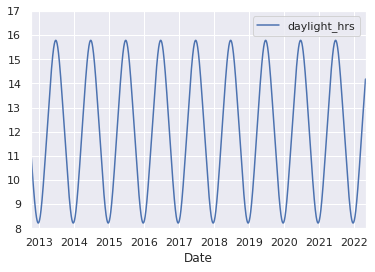

In [7]:
# Hint: Seattle es una ciudad donde el número de horas de luz en el día varían mucho durante el año
# Solución: Crearemos una variable que nos indique el número de horas de luz en el día
def hours_of_daylight(date, axis=23.44, latitude=47.61):
    """Compute the hours of daylight for the given date"""
    days = (date - pd.datetime(2000, 12, 21)).days
    m = (1. - np.tan(np.radians(latitude))
         * np.tan(np.radians(axis) * np.cos(days * 2 * np.pi / 365.25)))
    return 24. * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180.

daily['daylight_hrs'] = list(map(hours_of_daylight, daily.index))
daily[['daylight_hrs']].plot()
plt.ylim(8, 17)

In [8]:
# Hint: El clima es importante cuando queremos salir a montar bicicleta
# Solución: Calculamos un promedio de temperatura por día 
# Agregamos una variable de probabilidad de lluvia
# Agregamos una variable para los días sin lluvia (es importante saber si habrá poca lluvia pero más importante saber si no habrá)

In [9]:
# Las temperaturas estan en 1/10 grados C; Convertimos los datos a grados C
BicycleWeatherDF['TMIN'] /= 10
BicycleWeatherDF['TMAX'] /= 10
BicycleWeatherDF['Temp (C)'] = 0.5 * (BicycleWeatherDF['TMIN'] + BicycleWeatherDF['TMAX'])
# La precipitación esta en 1/10 mm; Convertimos a pulgadas
BicycleWeatherDF['PRCP'] /= 254
BicycleWeatherDF['dry day'] = (BicycleWeatherDF['PRCP'] == 0).astype(int)
daily = daily.join(BicycleWeatherDF[['PRCP', 'Temp (C)', 'dry day']])

In [10]:
# Hint: El calentamiento global modifica las temperaturas cada año
# Sol: Creamos una variable "contador" que nos ayuda a dar al modelo intuición sobre el año en curso
daily['annual'] = (daily.index - daily.index[0]).days / 365.

In [11]:
# Veamos el resultado
daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,PRCP,Temp (C),dry day,annual
Date,,,,,,,,,,,,,,
2012-10-03,14084.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.0,5.60,1.0,0.000000
2012-10-04,13900.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,5.65,1.0,0.002740
2012-10-05,12592.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.0,5.95,1.0,0.005479
2012-10-06,8024.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.0,6.05,1.0,0.008219
2012-10-07,8568.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.0,6.05,1.0,0.010959


Agrega una columna en el dataframe daily que se llame predicted y coloca en dicha columna los valores de una predicción de trafico de bicicletas.

In [12]:
daily = daily.dropna()
daily=daily.assign(Predicted=0)

In [13]:
daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,PRCP,Temp (C),dry day,annual,Predicted
Date,,,,,,,,,,,,,,,
2012-10-03,14084.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.0,5.60,1.0,0.000000,0
2012-10-04,13900.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,5.65,1.0,0.002740,0
2012-10-05,12592.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.0,5.95,1.0,0.005479,0
2012-10-06,8024.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.0,6.05,1.0,0.008219,0
2012-10-07,8568.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.0,6.05,1.0,0.010959,0


In [14]:
daily.shape

(1551, 15)

In [15]:
daily.isnull().sum()

Total           0
Mon             0
Tue             0
Wed             0
Thu             0
Fri             0
Sat             0
Sun             0
holiday         0
daylight_hrs    0
PRCP            0
Temp (C)        0
dry day         0
annual          0
Predicted       0
dtype: int64

In [16]:
daily

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,PRCP,Temp (C),dry day,annual,Predicted
Date,,,,,,,,,,,,,,,
2012-10-03,14084.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.000000,5.60,1.0,0.000000,0
2012-10-04,13900.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.000000,5.65,1.0,0.002740,0
2012-10-05,12592.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.000000,5.95,1.0,0.005479,0
2012-10-06,8024.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.000000,6.05,1.0,0.008219,0
2012-10-07,8568.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.000000,6.05,1.0,0.010959,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-27,4420.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,8.243449,0.000197,4.20,0.0,4.235616,0
2016-12-28,5888.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8.252283,0.000000,4.25,1.0,4.238356,0
2016-12-29,4536.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8.262456,0.000197,4.40,0.0,4.241096,0


In [17]:
daily.describe()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,PRCP,Temp (C),dry day,annual,Predicted
count,1551.000000,1551.000000,1551.000000,1551.000000,1551.000000,1551.000000,1551.000000,1551.000000,1551.000000,1551.000000,1551.000000,1551.000000,1551.000000,1551.000000,1551.0
mean,10460.894907,0.142489,0.142489,0.143133,0.143133,0.143133,0.143133,0.142489,0.022566,11.840251,0.000490,5.444810,0.560928,2.123288,0.0
std,5099.145171,0.349663,0.349663,0.350322,0.350322,0.350322,0.350322,0.349663,0.148563,2.621264,0.001060,1.067702,0.496434,1.227067,0.0
min,392.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.218894,0.000000,2.500000,0.000000,0.000000,0.0
25%,7028.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.291379,0.000000,4.650000,0.000000,1.061644,0.0
50%,9836.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.672607,0.000000,5.400000,1.000000,2.123288,0.0
75%,14450.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.398664,0.000512,6.300000,1.000000,3.184932,0.0
max,24352.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.781095,0.008661,8.200000,1.000000,4.246575,0.0


In [18]:
daily.keys()

Index(['Total', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'holiday',
       'daylight_hrs', 'PRCP', 'Temp (C)', 'dry day', 'annual', 'Predicted'],
      dtype='object')

In [19]:
daily.shape

(1551, 15)

In [20]:
X = daily.iloc[:,1:14]
Y = daily.iloc[:,0]

In [21]:
X.head(7)

,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,PRCP,Temp (C),dry day,annual
Date,,,,,,,,,,,,,
2012-10-03,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.0,5.60,1.0,0.000000
2012-10-04,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,5.65,1.0,0.002740
2012-10-05,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.0,5.95,1.0,0.005479
2012-10-06,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.0,6.05,1.0,0.008219
2012-10-07,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.0,6.05,1.0,0.010959
2012-10-08,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.987503,0.0,5.80,1.0,0.013699
2012-10-09,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,10.929950,0.0,5.45,1.0,0.016438


In [22]:
Y.head()

Date
2012-10-03    14084.0
2012-10-04    13900.0
2012-10-05    12592.0
2012-10-06     8024.0
2012-10-07     8568.0
Freq: D, Name: Total, dtype: float64

In [23]:
X.shape

(1551, 13)

In [24]:
Y.shape

(1551,)

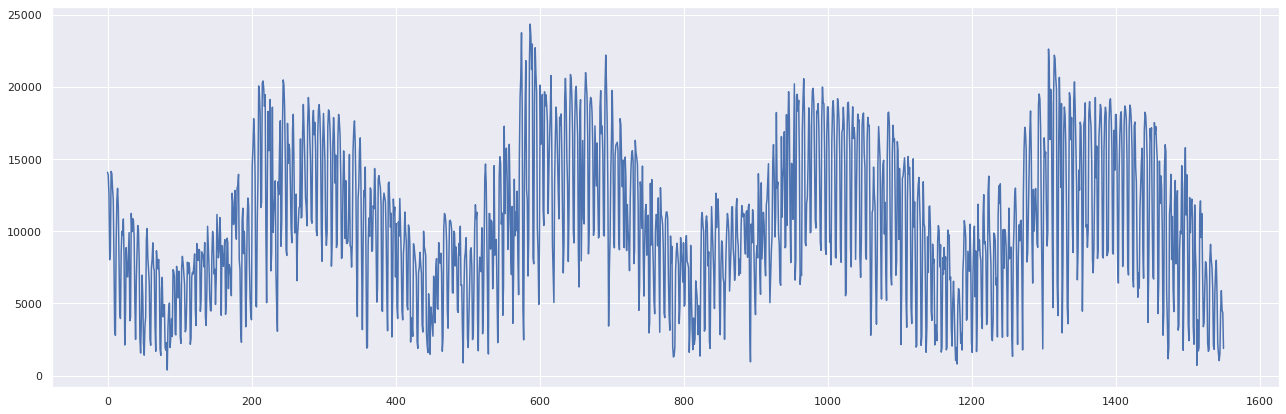

In [25]:
X_axis = list(range(X.shape[0]))
Y_axis = Y

fig, ax = plt.subplots()
ax.plot (X_axis,Y_axis, '-')
fig.set_size_inches(22,7)
plt.show()

In [26]:
import seaborn as sns

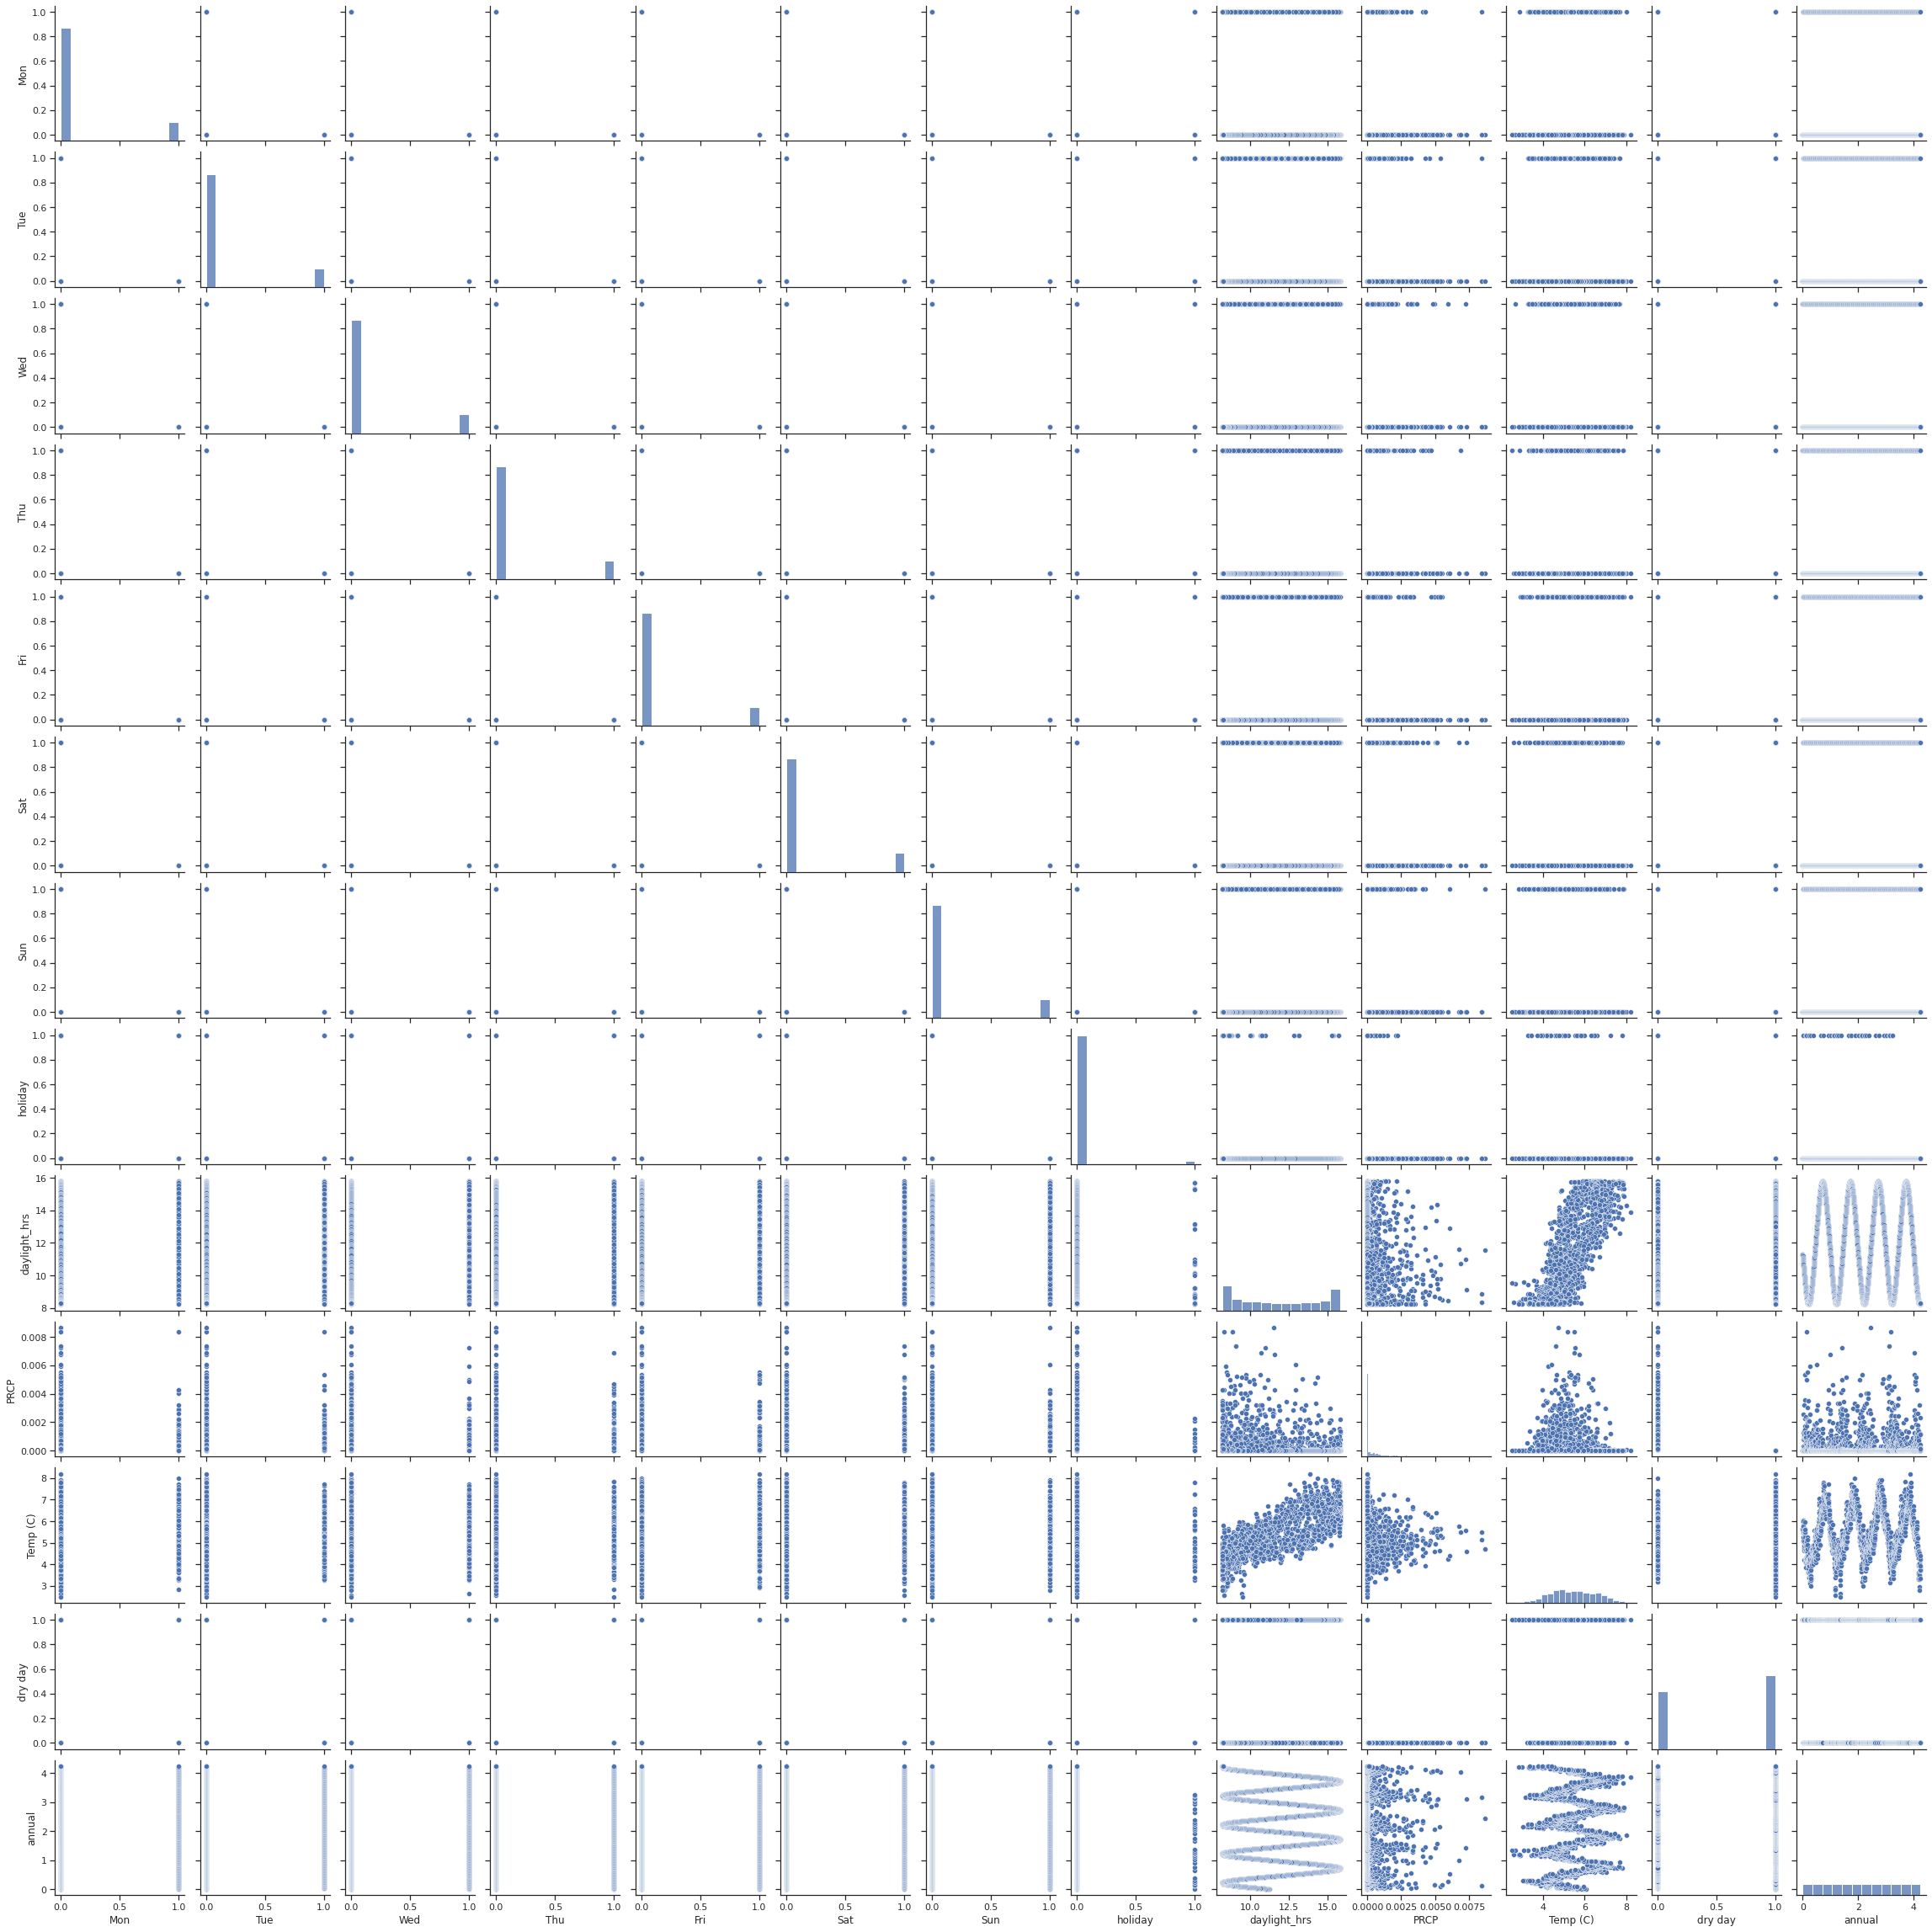

In [27]:
sns.set(style = 'ticks')
sns.pairplot(X)

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=1)

In [30]:
X_train.shape

(1085, 13)

In [31]:
X.shape

(1551, 13)

In [32]:
X_test.shape

(466, 13)

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
model = LinearRegression()

In [35]:
model

LinearRegression()

In [36]:
model.fit(X_train, Y_train)

LinearRegression()

In [37]:
y_predicts = model.predict(X_test)

In [38]:
#y_predicts

In [39]:
y_predicts.shape

(466,)

In [40]:
comp = pd.DataFrame({'Real':Y_test, 'Predicted': y_predicts })
comp.head(10)

,Real,Predicted
Date,,
2015-05-02,8860.0,8568.781468
2013-11-03,5284.0,2573.262700
2015-09-09,17252.0,16490.031193
2016-04-07,18332.0,15804.850576
2014-02-06,6248.0,8043.648097
2015-07-13,16276.0,17817.593418
2012-12-07,7264.0,6590.876500
2015-10-12,13672.0,7124.630300
2012-12-02,2108.0,-121.584507


In [41]:
from sklearn.metrics import mean_squared_error

In [42]:
MSE = mean_squared_error (Y_test, y_predicts)

In [43]:
MSE

4065567.170434389

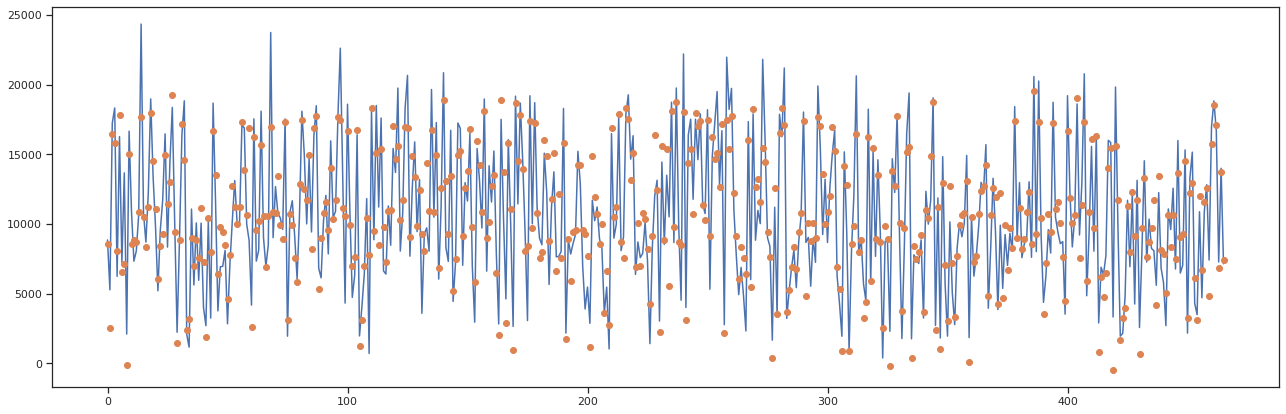

In [44]:
X_axis2 = list(range(X_test.shape[0]))
Y_axis2 = Y_test
Y2_axis2 = y_predicts

fig, ax = plt.subplots()
ax.plot (X_axis2,Y_axis2, '-', X_axis2, Y2_axis2, 'o')
fig.set_size_inches(22,7)
plt.show()

In [45]:
def plot_20(Y_True, Y_Pr):
    X_axis3 = list(range(20))
    Y_axis3 = Y_True[:20]
    Y2_axis3 = Y_Pr[:20]

    fig, ax = plt.subplots()
    ax.plot (X_axis3,Y_axis3, '-', X_axis3, Y2_axis3, 'o')
    fig.set_size_inches(22,7)
    

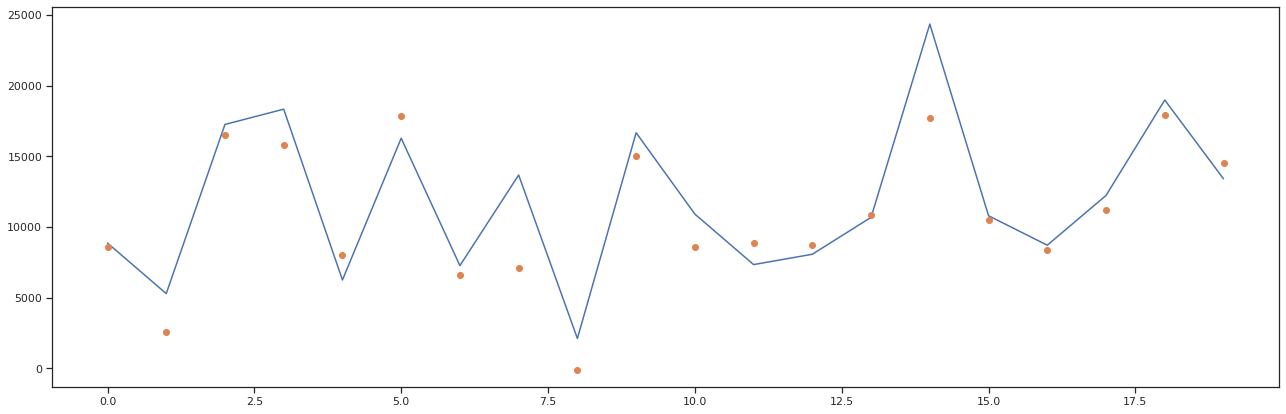

In [46]:
plot_20(Y_test, y_predicts)

Ridge

In [47]:
from sklearn.linear_model import Ridge

In [48]:
ridge = Ridge(alpha=1)

In [49]:
ridge.fit(X_train, Y_train)
y_predicts = ridge.predict(X_test)
print(mean_squared_error(Y_test, y_predicts))

4588570.148879783


In [50]:
alphas = np.arange(0.001, 0.1, 0.001)

In [51]:
len(alphas)

99

In [52]:
mse = list()
for alpha in alphas:
  ridge = Ridge(alpha=alpha)
  ridge.fit(X_train, Y_train)
  y_predicts = ridge.predict(X_test)
  error = round(mean_squared_error(Y_test, y_predicts),3)
  mse.append(error)

alpha_error = pd.DataFrame({'mse': mse, 'alpha':alphas})

In [53]:
alpha_error.head()

,mse,alpha
0,4247188.414,0.001
1,4344986.130,0.002
2,4398576.344,0.003
3,4432012.527,0.004
4,4454793.790,0.005


In [54]:
alpha_error[alpha_error['mse'] == alpha_error ['mse'].min()]

,mse,alpha
0,4247188.414,0.001


In [55]:
ridge = Ridge(alpha=0.001)
ridge.fit(X_train, Y_train)
y_predicts = ridge.predict(X_test)
print(mean_squared_error(Y_test, y_predicts))

4247188.413729758


Lasso

In [56]:
from sklearn.linear_model import Lasso

In [57]:
mse = list()
for alpha in alphas:
  lasso = Lasso(alpha=alpha)
  lasso.fit(X_train, Y_train)
  y_predicts = lasso.predict(X_test)
  error = round(mean_squared_error(Y_test, y_predicts),3)
  mse.append(error)

alpha_error = pd.DataFrame({'mse': mse, 'alpha':alphas})

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.063e+07, tolerance: 2.787e+06
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.074e+07, tolerance: 2.787e+06
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

In [58]:
alpha_error

,mse,alpha
0,4065793.330,0.001
1,4066022.882,0.002
2,4066255.825,0.003
3,4066492.159,0.004
4,4066731.885,0.005
...,...,...
94,4102195.655,0.095
95,4102744.013,0.096
96,4103295.762,0.097
97,4103850.903,0.098


In [59]:
alpha_error[alpha_error['mse'] == alpha_error ['mse'].min()]

,mse,alpha
0,4065793.33,0.001


In [60]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train, Y_train)
y_predicts = lasso.predict(X_test)
error = round(mean_squared_error(Y_test, y_predicts),3)
print(error)

4065793.33


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.063e+07, tolerance: 2.787e+06
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


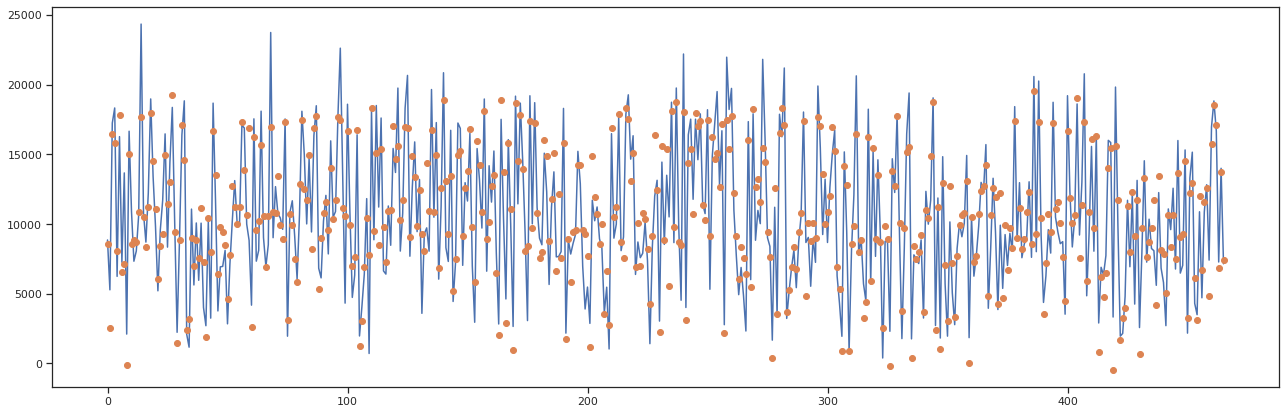

In [61]:
X_axis4 = list(range(X_test.shape[0]))
Y_axis4 = Y_test
Y2_axis4 = y_predicts

fig, ax = plt.subplots()
ax.plot (X_axis4,Y_axis4, '-', X_axis4, Y2_axis4, 'o')
fig.set_size_inches(22,7)
plt.show()